This is Project 1 predicting heart diseases using various machine learning algorithms. The dataset is taken from UCI, It has 303 instances of data having 14 columns.

#### 1. Importing various labraries and dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 2. EDA

In [2]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum().any()

False

We see, there are 303 rows, no null values are present.

In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

age, trestbps, chol, thalach, and oldpeak are continuous in nature and rest are categorical.

In [6]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
cate_features = []
cont_features = []

for col in df.columns:
    if len(df[col].value_counts())<= 5:
        cate_features.append(col)
    else:
        cont_features.append(col)
print('Categorical features are:\n', cate_features)
print('\nContinuous features are:\n',cont_features)

Categorical features are:
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Continuous features are:
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

The dataset is almost balanced.

In [10]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0, 0.5, 'Count')

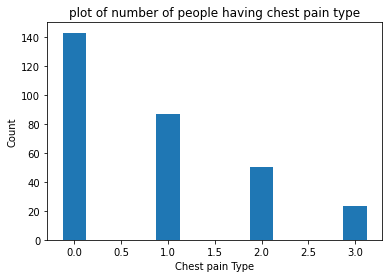

In [11]:
plt.bar(range(4), df.cp.value_counts(), width=.25)
plt.title('plot of number of people having chest pain type')
plt.xlabel('Chest pain Type')
plt.ylabel('Count')

More people are havig chest pain type 0  > type 1 > type 2 > type 3

In [12]:
df.loc[df.target==1].sex.value_counts()

1    93
0    72
Name: sex, dtype: int64

Text(0, 0.5, 'Count')

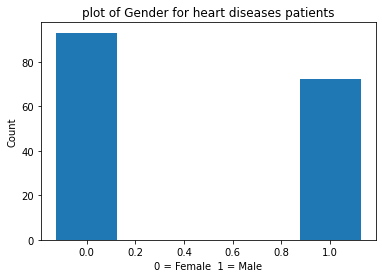

In [13]:
plt.bar(range(2), df.loc[df.target==1].sex.value_counts(), width=.25)
plt.title('plot of Gender for heart diseases patients')
plt.xlabel('0 = Female  1 = Male')
plt.ylabel('Count')

More Females is seen to have heart diseases than males.

Text(26.794296875000008, 0.5, 'Cholestrol')

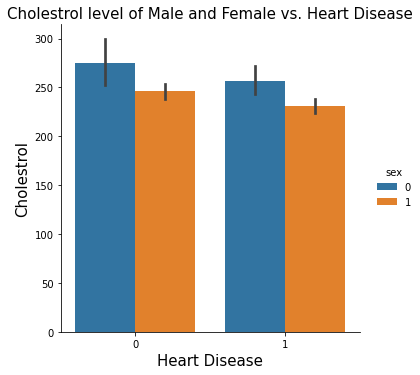

In [14]:
sns.catplot(x='target', y='chol', hue='sex', kind='bar', data=df)
plt.title('Cholestrol level of Male and Female vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=15)
plt.ylabel('Cholestrol',size=15)

It is seen that cholestrol of heart patient female is higher than male.
It is also seen that cholestrol level of heart diseases patient is lower than healthy heart patients, which is suspicious.

Text(26.04390625, 0.5, 'Cholestrol')

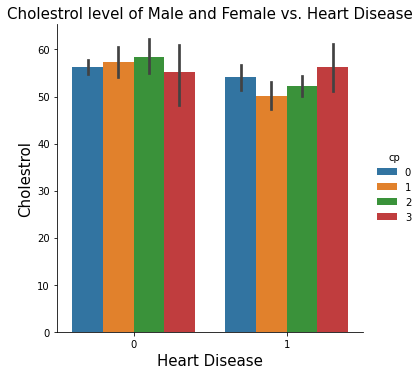

In [15]:
sns.catplot(x='target', y='age', hue='cp', kind='bar', data=df)
plt.title('Cholestrol level of Male and Female vs. Heart Disease',size=15)
plt.xlabel('Heart Disease',size=15)
plt.ylabel('Cholestrol',size=15)

Chest pain type 3 most likely to have heart diseases.

Text(0, 0.5, 'Max. heat rate achieved')

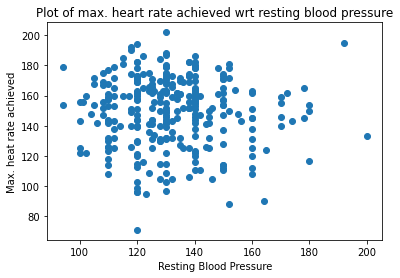

In [16]:
plt.scatter(df.trestbps, df.thalach)
plt.title("Plot of max. heart rate achieved wrt resting blood pressure")
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Max. heat rate achieved')

Max people number of people are concentrated between resting blood pressure of 120-140 and Max heart rate of 140-180.

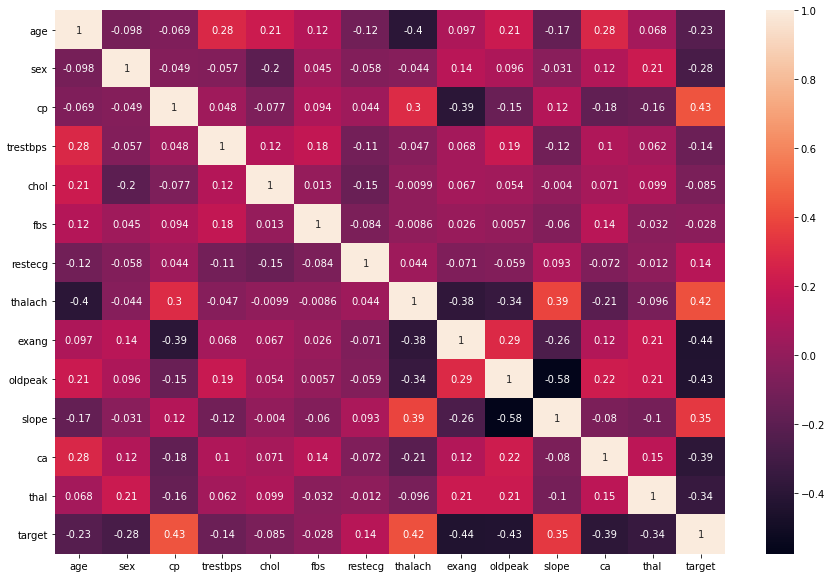

In [17]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

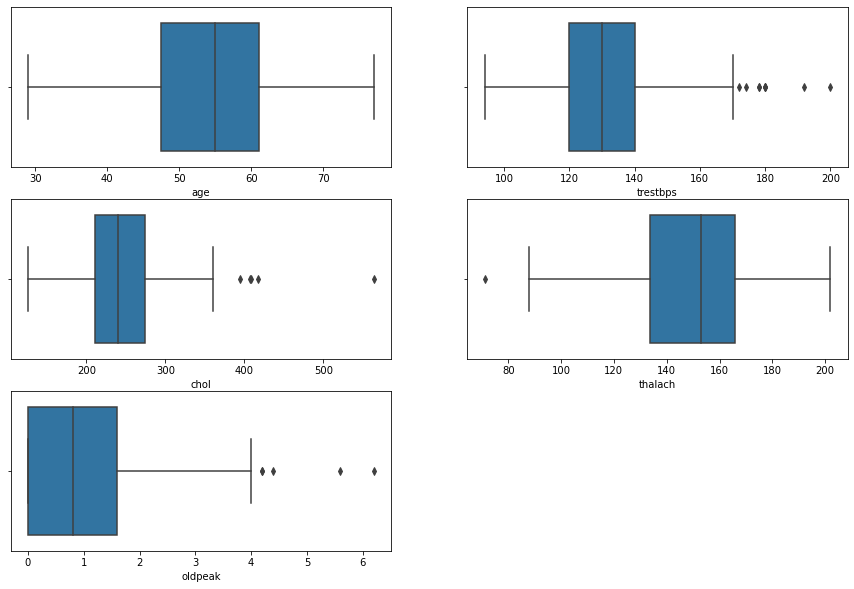

In [18]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cont_features,1):
    plt.subplot(3,2,i)
    sns.boxplot(df[col])

In [19]:
df.loc[(df.trestbps > 175)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [20]:
df.shape

(303, 14)

In [21]:
(df.loc[(df.trestbps > 175)]).shape

(7, 14)

In [22]:
(df.loc[(df.trestbps > 175)]).index

Int64Index([101, 110, 203, 223, 248, 260, 266], dtype='int64')

In [23]:
df.drop((df.loc[(df.trestbps > 175)]).index, axis=0, inplace=True)

In [24]:
df.shape

(296, 14)

In [25]:
df.loc[(df.chol > 400)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [26]:
df.loc[(df.chol > 400)].index

Int64Index([28, 85, 220, 246], dtype='int64')

In [27]:
df.drop((df.loc[(df.chol > 400)].index),inplace=True)

In [28]:
df.shape

(292, 14)

In [29]:
df.loc[(df.thalach < 80)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [30]:
df.drop((df.loc[(df.thalach < 80)].index), inplace=True)

In [31]:
df.shape

(291, 14)

In [32]:
df.loc[(df.oldpeak > 4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [33]:
df.loc[(df.oldpeak > 4)].index

Int64Index([204, 221, 250, 291], dtype='int64')

In [34]:
df.drop((df.loc[(df.oldpeak > 4)].index), inplace=True)

In [35]:
df.shape

(287, 14)

This (287) is the final rows remaining after removal of outliers.

In [36]:
df.target.value_counts()

1    161
0    126
Name: target, dtype: int64

The dataset is still balanced after removal of outliers.

In [37]:
df.loc[df.target==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,52.217391,0.571429,1.366460,128.708075,238.459627,0.136646,0.602484,158.577640,0.136646,0.556522,1.602484,0.366460,2.111801,1.0
std,9.488609,0.496416,0.946635,15.321814,45.162622,0.344545,0.503482,19.378996,0.344545,0.730307,0.583947,0.856515,0.460893,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,162.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,58.000000,1.000000,2.000000,140.000000,265.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,172.000000,394.000000,1.000000,2.000000,202.000000,1.000000,3.500000,2.000000,4.000000,3.000000,1.0


In [38]:
df.loc[df.target==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0
mean,56.349206,0.857143,0.500000,132.214286,247.619048,0.150794,0.428571,139.230159,0.547619,1.440476,1.206349,1.126984,2.531746,0.0
std,8.116470,0.351324,0.927362,16.048231,45.561713,0.359276,0.512696,21.804279,0.499714,1.126352,0.541368,1.011803,0.689191,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,213.000000,0.000000,0.000000,125.000000,0.000000,0.425000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,248.500000,0.000000,0.000000,142.000000,1.000000,1.300000,1.000000,1.000000,3.000000,0.0
75%,61.750000,1.000000,0.750000,140.000000,282.000000,0.000000,1.000000,156.750000,1.000000,2.200000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,174.000000,353.000000,1.000000,2.000000,182.000000,1.000000,4.000000,2.000000,4.000000,3.000000,0.0


The average Resting blood pressure is almost same for heart diseases patients and healthy heart patients.
The average cp value for heart diseases patients (1.32) are 3 times higher than health heart patients (0.5)
which means higher the chest pain, higher is the chance of being heart diseases.
The average Relative ST stress is 3 times lower (0.55) for heart diseases patients than for healthy heart patients(1.44).
The average max. heart rate achieved for heart diseases patiets is about 160 whereas the for healthy heart patient is 140.

#### 4. Data Processing

In [39]:
cate_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [40]:
cate_features.remove('target')

In [41]:
cate_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [42]:
df[cate_features]

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [43]:
df[cont_features]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [44]:
df.ca.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [45]:
df1 = pd.get_dummies(df,columns=cate_features)

In [46]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [47]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1[cont_features] = sc.fit_transform(df1[cont_features])

In [49]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.983905,0.94045,-0.208793,-0.003708,1.327592,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.868426,-0.01577,0.165591,1.636900,2.502973,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.429606,-0.01577,-0.847447,0.971789,0.446057,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.215970,-0.65325,-0.142725,1.237834,-0.141633,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.325675,-0.65325,2.455940,0.572722,-0.337529,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
df1.shape

(287, 31)

#### 5. Spliting the data

In [51]:
X = df1.drop('target', axis=1)
y = df1.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

#### 6. Defining function for Training, Predicting and Metrics Evaluation

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Result = pd.DataFrame(columns=['Model','Accuracy_score', 'precision_0','precision_1','recall_0','recall_1','Type 1 Error','Type 2 Error'])
def metrics_evaluation (model, model_name):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    Accuracy_score = accuracy_score(y_test, y_predict)
    print('\n The accuracy score of ' +model_name, 'is:', Accuracy_score)
    C_matrix = pd.crosstab(y_test, y_predict)
    print('\n The confusion matrix of '+model_name, 'is:\n\n', C_matrix)
    C_report = classification_report(y_test, y_predict)
    print('\nThe classification report of '+model_name, 'is:\n\n', C_report)
    precision_1 = C_matrix[1][1]/(C_matrix[1][0]+C_matrix[1][1])
    precision_0 = C_matrix[0][0]/(C_matrix[0][0]+C_matrix[0][1])
    recall_0 = C_matrix[0][0]/(C_matrix[0][0]+C_matrix[1][0])
    recall_1 = C_matrix[1][1]/(C_matrix[0][1]+C_matrix[1][1])
    print('\n The precision of 1 is:',precision_1)
    print('\n The precision of 0 is:',precision_0)
    print('\n The recall of 1 is:',recall_1)
    print('\n The recall of 0 is:',recall_0)
    fp = C_matrix[1][0]
    fn = C_matrix[0][1]
    print('\n The False Positives i.e. type 1 error is:', fp)
    print('\n The False Negatives i.e. type 2 error is:', fn)
    return(model_name, Accuracy_score, precision_0,precision_1,recall_0,recall_1,fp,fn)

#### 7. Training different machine learning algorithms

In [53]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
Result1 = pd.Series(metrics_evaluation(model1, 'Logistic Regression'), index=Result.columns)
Result = Result.append(Result1,ignore_index=True)
Result


 The accuracy score of Logistic Regression is: 0.896551724137931

 The confusion matrix of Logistic Regression is:

 col_0    0   1
target        
0       26   5
1        1  26

The classification report of Logistic Regression is:

               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.84      0.96      0.90        27

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.91      0.90      0.90        58


 The precision of 1 is: 0.8387096774193549

 The precision of 0 is: 0.9629629629629629

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8387096774193549

 The False Positives i.e. type 1 error is: 5

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.83871,0.83871,0.962963,5,1


In [223]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter=2000)
Result2 = pd.Series(metrics_evaluation(model2, 'Logistic Regression with 2000 iteration'), index=Result.columns)
Result = Result.append(Result2,ignore_index=True)
Result


 The accuracy score of Logistic Regression with 2000 iteration is: 0.896551724137931

 The confusion matrix of Logistic Regression with 2000 iteration is:

 col_0    0   1
target        
0       26   5
1        1  26

The classification report of Logistic Regression with 2000 iteration is:

               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.84      0.96      0.90        27

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.91      0.90      0.90        58


 The precision of 1 is: 0.8387096774193549

 The precision of 0 is: 0.9629629629629629

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8387096774193549

 The False Positives i.e. type 1 error is: 5

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.83871,0.83871,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.83871,0.83871,0.962963,5,1


In [224]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(max_iter=5000)
Result3 = pd.Series(metrics_evaluation(model2, 'Logistic Regression with 5000 iteration'), index=Result.columns)
Result = Result.append(Result3,ignore_index=True)
Result


 The accuracy score of Logistic Regression with 5000 iteration is: 0.896551724137931

 The confusion matrix of Logistic Regression with 5000 iteration is:

 col_0    0   1
target        
0       26   5
1        1  26

The classification report of Logistic Regression with 5000 iteration is:

               precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.84      0.96      0.90        27

    accuracy                           0.90        58
   macro avg       0.90      0.90      0.90        58
weighted avg       0.91      0.90      0.90        58


 The precision of 1 is: 0.8387096774193549

 The precision of 0 is: 0.9629629629629629

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8387096774193549

 The False Positives i.e. type 1 error is: 5

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.83871,0.83871,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.83871,0.83871,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.83871,0.83871,0.962963,5,1


In [225]:
from sklearn.svm import SVC
model4 = SVC()
Result4 = pd.Series(metrics_evaluation(model4, 'SVC with default parameter'), index=Result.columns)
Result = Result.append(Result4,ignore_index=True)
Result


 The accuracy score of SVC with default parameter is: 0.9310344827586207

 The confusion matrix of SVC with default parameter is:

 col_0    0   1
target        
0       28   3
1        1  26

The classification report of SVC with default parameter is:

               precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.96      0.93        27

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58


 The precision of 1 is: 0.896551724137931

 The precision of 0 is: 0.9655172413793104

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.9032258064516129

 The False Positives i.e. type 1 error is: 3

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1


In [226]:
model5 = SVC( kernel='linear', C=10, gamma=0.5)
Result5 = pd.Series(metrics_evaluation(model5, 'SVC with kernel= linear, C=10, gamma=0.5'), index=Result.columns)
Result = Result.append(Result5,ignore_index=True)
Result


 The accuracy score of SVC with kernel= linear, C=10, gamma=0.5 is: 0.8793103448275862

 The confusion matrix of SVC with kernel= linear, C=10, gamma=0.5 is:

 col_0    0   1
target        
0       25   6
1        1  26

The classification report of SVC with kernel= linear, C=10, gamma=0.5 is:

               precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.81      0.96      0.88        27

    accuracy                           0.88        58
   macro avg       0.89      0.88      0.88        58
weighted avg       0.89      0.88      0.88        58


 The precision of 1 is: 0.8125

 The precision of 0 is: 0.9615384615384616

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8064516129032258

 The False Positives i.e. type 1 error is: 6

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1


#### 8. Performing hypertuning to find optimal parameters

In [227]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel' : ['rbf', 'linear'],
    'C' : [1,10,20,50,100],
    'gamma' : [0.01, 0.1, 0.5, 0.75, 1]
}
grid_model = GridSearchCV(SVC(), parameters, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.

[CV] END .......................C=20, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=20, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=20, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=20, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=20, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=20, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=20, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=20, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=20, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=20, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=20, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=20, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 50, 100],
                         'gamma': [0.01, 0.1, 0.5, 0.75, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [228]:
grid_model.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [229]:
grid_model.best_score_

0.8341062801932366

In [230]:
model6 = SVC( kernel='rbf', C=1, gamma=0.1)
Result6 = pd.Series(metrics_evaluation(model6, 'SVC with kernel= rbf, C=1, gamma=0.1'), index=Result.columns)
Result = Result.append(Result6,ignore_index=True)
Result


 The accuracy score of SVC with kernel= rbf, C=1, gamma=0.1 is: 0.9310344827586207

 The confusion matrix of SVC with kernel= rbf, C=1, gamma=0.1 is:

 col_0    0   1
target        
0       28   3
1        1  26

The classification report of SVC with kernel= rbf, C=1, gamma=0.1 is:

               precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.96      0.93        27

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58


 The precision of 1 is: 0.896551724137931

 The precision of 0 is: 0.9655172413793104

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.9032258064516129

 The False Positives i.e. type 1 error is: 3

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1


In [231]:
from sklearn.neural_network import MLPClassifier
model7 = MLPClassifier(hidden_layer_sizes=(8,32,9), max_iter=2000)
Result7 = pd.Series(metrics_evaluation(model7, 'ANN (8,32,9) with iteration 2000'), index=Result.columns)
Result = Result.append(Result7,ignore_index=True)
Result


 The accuracy score of ANN (8,32,9) with iteration 2000 is: 0.8448275862068966

 The confusion matrix of ANN (8,32,9) with iteration 2000 is:

 col_0    0   1
target        
0       26   5
1        4  23

The classification report of ANN (8,32,9) with iteration 2000 is:

               precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.82      0.85      0.84        27

    accuracy                           0.84        58
   macro avg       0.84      0.85      0.84        58
weighted avg       0.85      0.84      0.84        58


 The precision of 1 is: 0.8214285714285714

 The precision of 0 is: 0.8666666666666667

 The recall of 1 is: 0.8518518518518519

 The recall of 0 is: 0.8387096774193549

 The False Positives i.e. type 1 error is: 5

 The False Negatives i.e. type 2 error is: 4


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4


In [232]:
from sklearn.ensemble import RandomForestClassifier
model8 = RandomForestClassifier(n_estimators=250)
Result8 = pd.Series(metrics_evaluation(model8, 'Random Forest with 250 estimators'), index=Result.columns)
Result = Result.append(Result8,ignore_index=True)
Result


 The accuracy score of Random Forest with 250 estimators is: 0.9137931034482759

 The confusion matrix of Random Forest with 250 estimators is:

 col_0    0   1
target        
0       27   4
1        1  26

The classification report of Random Forest with 250 estimators is:

               precision    recall  f1-score   support

           0       0.96      0.87      0.92        31
           1       0.87      0.96      0.91        27

    accuracy                           0.91        58
   macro avg       0.92      0.92      0.91        58
weighted avg       0.92      0.91      0.91        58


 The precision of 1 is: 0.8666666666666667

 The precision of 0 is: 0.9642857142857143

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8709677419354839

 The False Positives i.e. type 1 error is: 4

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4
7,Random Forest with 250 estimators,0.913793,0.964286,0.866667,0.870968,0.962963,4,1


In [233]:
from sklearn.tree import DecisionTreeClassifier
model9 = DecisionTreeClassifier(max_depth=2)
Result9 = pd.Series(metrics_evaluation(model9, 'Decison Trees with depth of 2'), index=Result.columns)
Result = Result.append(Result9,ignore_index=True)
Result


 The accuracy score of Decison Trees with depth of 2 is: 0.7413793103448276

 The confusion matrix of Decison Trees with depth of 2 is:

 col_0    0   1
target        
0       16  15
1        0  27

The classification report of Decison Trees with depth of 2 is:

               precision    recall  f1-score   support

           0       1.00      0.52      0.68        31
           1       0.64      1.00      0.78        27

    accuracy                           0.74        58
   macro avg       0.82      0.76      0.73        58
weighted avg       0.83      0.74      0.73        58


 The precision of 1 is: 0.6428571428571429

 The precision of 0 is: 1.0

 The recall of 1 is: 1.0

 The recall of 0 is: 0.5161290322580645

 The False Positives i.e. type 1 error is: 15

 The False Negatives i.e. type 2 error is: 0


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4
7,Random Forest with 250 estimators,0.913793,0.964286,0.866667,0.870968,0.962963,4,1
8,Decison Trees with depth of 2,0.741379,1.000000,0.642857,0.516129,1.000000,15,0


In [234]:
from sklearn.neighbors import KNeighborsClassifier
model10 = KNeighborsClassifier(n_neighbors=5)
Result10 = pd.Series(metrics_evaluation(model10, 'KNN with 5 neighbours'), index=Result.columns)
Result = Result.append(Result10,ignore_index=True)
Result


 The accuracy score of KNN with 5 neighbours is: 0.8793103448275862

 The confusion matrix of KNN with 5 neighbours is:

 col_0    0   1
target        
0       25   6
1        1  26

The classification report of KNN with 5 neighbours is:

               precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.81      0.96      0.88        27

    accuracy                           0.88        58
   macro avg       0.89      0.88      0.88        58
weighted avg       0.89      0.88      0.88        58


 The precision of 1 is: 0.8125

 The precision of 0 is: 0.9615384615384616

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.8064516129032258

 The False Positives i.e. type 1 error is: 6

 The False Negatives i.e. type 2 error is: 1


C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4
7,Random Forest with 250 estimators,0.913793,0.964286,0.866667,0.870968,0.962963,4,1
8,Decison Trees with depth of 2,0.741379,1.000000,0.642857,0.516129,1.000000,15,0
9,KNN with 5 neighbours,0.879310,0.961538,0.812500,0.806452,0.962963,6,1


In [235]:
from sklearn.naive_bayes import BernoulliNB
model11 = BernoulliNB()
Result11 = pd.Series(metrics_evaluation(model11, 'Naive Bayes'), index=Result.columns)
Result = Result.append(Result11,ignore_index=True)
Result


 The accuracy score of Naive Bayes is: 0.8620689655172413

 The confusion matrix of Naive Bayes is:

 col_0    0   1
target        
0       26   5
1        3  24

The classification report of Naive Bayes is:

               precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.83      0.89      0.86        27

    accuracy                           0.86        58
   macro avg       0.86      0.86      0.86        58
weighted avg       0.86      0.86      0.86        58


 The precision of 1 is: 0.8275862068965517

 The precision of 0 is: 0.896551724137931

 The recall of 1 is: 0.8888888888888888

 The recall of 0 is: 0.8387096774193549

 The False Positives i.e. type 1 error is: 5

 The False Negatives i.e. type 2 error is: 3


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4
7,Random Forest with 250 estimators,0.913793,0.964286,0.866667,0.870968,0.962963,4,1
8,Decison Trees with depth of 2,0.741379,1.000000,0.642857,0.516129,1.000000,15,0
9,KNN with 5 neighbours,0.879310,0.961538,0.812500,0.806452,0.962963,6,1


In [236]:
from xgboost import XGBClassifier

model12 = XGBClassifier(
    random_state=50,
    max_depth=4,
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=1,
    subsample=0.88,
    reg_lambda=1,
    reg_alpha=1
)
Result12 = pd.Series(metrics_evaluation(model12, 'XG Boost'), index=Result.columns)
Result = Result.append(Result12,ignore_index=True)
Result

[23:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raghav\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



 The accuracy score of XG Boost is: 0.8620689655172413

 The confusion matrix of XG Boost is:

 col_0    0   1
target        
0       24   7
1        1  26

The classification report of XG Boost is:

               precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.79      0.96      0.87        27

    accuracy                           0.86        58
   macro avg       0.87      0.87      0.86        58
weighted avg       0.88      0.86      0.86        58


 The precision of 1 is: 0.7878787878787878

 The precision of 0 is: 0.96

 The recall of 1 is: 0.9629629629629629

 The recall of 0 is: 0.7741935483870968

 The False Positives i.e. type 1 error is: 7

 The False Negatives i.e. type 2 error is: 1


,Model,Accuracy_score,precision_0,precision_1,recall_0,recall_1,Type 1 Error,Type 2 Error
0,Logistic Regression,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
1,Logistic Regression with 2000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
2,Logistic Regression with 5000 iteration,0.896552,0.962963,0.838710,0.838710,0.962963,5,1
3,SVC with default parameter,0.931034,0.965517,0.896552,0.903226,0.962963,3,1
4,"SVC with kernel= linear, C=10, gamma=0.5",0.879310,0.961538,0.812500,0.806452,0.962963,6,1
5,"SVC with kernel= rbf, C=1, gamma=0.1",0.931034,0.965517,0.896552,0.903226,0.962963,3,1
6,"ANN (8,32,9) with iteration 2000",0.844828,0.866667,0.821429,0.838710,0.851852,5,4
7,Random Forest with 250 estimators,0.913793,0.964286,0.866667,0.870968,0.962963,4,1
8,Decison Trees with depth of 2,0.741379,1.000000,0.642857,0.516129,1.000000,15,0
9,KNN with 5 neighbours,0.879310,0.961538,0.812500,0.806452,0.962963,6,1
